In [ ]:
pip install -U scikit-fuzzy

In [8]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
customers = pd.read_csv(file_content_stream)
customers.head()

,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23


In [9]:
## Dropping ID variable 
customers = customers.drop(columns = ['ID'], axis = 1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [10]:
## Transforming variables to 0-1
scaler = MinMaxScaler()
customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']] = scaler.fit_transform(customers[['Visit_Time', 'Average_Expense', 'Age']])
customers.head()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Age_0_1
0,3,5.7,0,10,0.117647,0.041096,0.051282
1,5,14.5,0,27,0.235294,0.342466,0.487179
2,16,33.5,0,32,0.882353,0.993151,0.615385
3,5,15.9,0,30,0.235294,0.390411,0.564103
4,16,24.9,0,23,0.882353,0.698630,0.384615


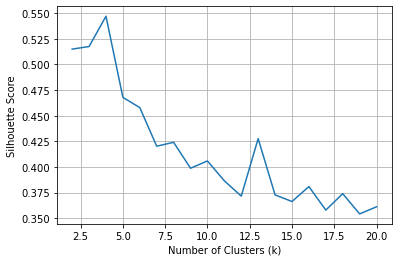

In [12]:
## Defining list to store slihouette score
silhouette = list()

for i in range(2, 21):
    
    ## Clustering the data 
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(customers[['Sex', 'Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']])
    kmeans_md_labels = kmeans_md.labels_
    
    ## Computing the silhouette score
    silhouette.append(silhouette_score(customers[['Sex', 'Visit_Time_0_1', 'Average_Expense_0_1', 'Age_0_1']], kmeans_md_labels))

## Visualizing the results
plt.plot(range(2, 21), silhouette)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [ ]:
## Fitting Fuzzy C-means with 4 clusters
fc, W, u0, d, jm, p, pc = cmeans()